# __Data Wrangling__

## __Agenda__

- Introduction to Data Wrangling
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handling Outliers
- Pandas Joining Techniques
    * Pandas Concatenate
    * Pandas Merge Dataframes
    * Pandas Join Dataframes
- Aggregating Data
- Reshaping Data

## __1. Introduction to Data Wrangling__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Introduction.png)

## __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (application programming interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

### __Loading Data:__
Start by loading data into a Pandas DataFrame

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Loading.png)

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('HousePrices.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df.shape

(4600, 18)

In [5]:
df.dtypes


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

## __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step involves using functions like df.head(), df.info(), and df.describe() to gain insights into the dataset's structure, data types, and statistical summaries. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.

In [7]:
# Displaying the last few rows of the DataFrame
print(df.tail())

                     date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501

In [9]:
# Providing information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# Inspecting the first few rows of the DataFrame
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [13]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [11]:
df.shape

(4600, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [17]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [19]:
df.isnull()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows you to access specific rows based on integer-location or label-based indexing, respectively.

In [29]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()

Result for df.iloc[0]:
date              2014-05-02 00:00:00
price                        313000.0
bedrooms                          3.0
bathrooms                         1.5
sqft_living                      1340
sqft_lot                         7912
floors                            1.5
waterfront                          0
view                                0
condition                           3
sqft_above                       1340
sqft_basement                       0
yr_built                         1955
yr_renovated                     2005
street           18810 Densmore Ave N
city                        Shoreline
statezip                     WA 98133
country                           USA
Name: 0, dtype: object



In [ ]:
# Access the first column using iloc
result_iloc_0 = df.iloc[:,0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()

In [31]:
# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)


Result for df.iloc[10]:
date             2014-05-02 00:00:00
price                       463000.0
bedrooms                         3.0
bathrooms                       1.75
sqft_living                     1710
sqft_lot                        7320
floors                           1.0
waterfront                         0
view                               0
condition                          3
sqft_above                      1710
sqft_basement                      0
yr_built                        1948
yr_renovated                    1994
street            Burke-Gilman Trail
city                Lake Forest Park
statezip                    WA 98155
country                          USA
Name: 10, dtype: object


In [33]:
# Access the eleventh column using iloc
result_iloc_10 = df.iloc[:,10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)

Result for df.iloc[10]:
0       1340
1       3370
2       1930
3       1000
4       1140
        ... 
4595    1510
4596    1460
4597    3010
4598    1070
4599    1490
Name: sqft_above, Length: 4600, dtype: int64


### __3.2 Checking for Missing Values__
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Checking_for_missing_values.png)

In [35]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### __3.3 Handling Missing Data__
Handling missing data is crucial for maintaining data integrity. Various approaches include imputation (replacing missing values with estimated values), the removal of records with missing values, or using default values when appropriate.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Handling_missing_data.png)

To handle missing values in numerical columns of the dataset, we utilize `iloc` to select them, excluding text columns. Thus, we focus solely on columns 1 to 14, which do not contain text data.

In [39]:
# Handling missing values using imputation
df_filled = df.fillna(df.iloc[:, 1:14].mean())
df_filled

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential for ensuring accurate analysis and reporting.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Dealing_with_duplicates.png)

In [47]:
df.duplicated().sum()

0

In [ ]:
# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

By default, `drop_duplicates()` retains the first occurrence of a duplicate and removes subsequent ones. This behavior can be changed using the `keep` parameter, if specified otherwise.

## __5. Data Cleaning__

This includes correcting typographical errors, standardizing date formats, and resolving inconsistencies in categorical data labeling.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [49]:
df['date'].dtype

dtype('O')

In [53]:
# Cleaning data by standardizing formats
df['date1'] = pd.to_datetime(df['date'])
df['date1'].dtypes

dtype('<M8[ns]')

In [55]:
type(df['date1'])

pandas.core.series.Series

In [57]:
# Displaying the DataFrame after cleaning
df['date'] = pd.to_datetime(df['date'])
print("DataFrame after cleaning data by standardizing formats:")
print(df)

DataFrame after cleaning data by standardizing formats:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  water

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

## __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed.

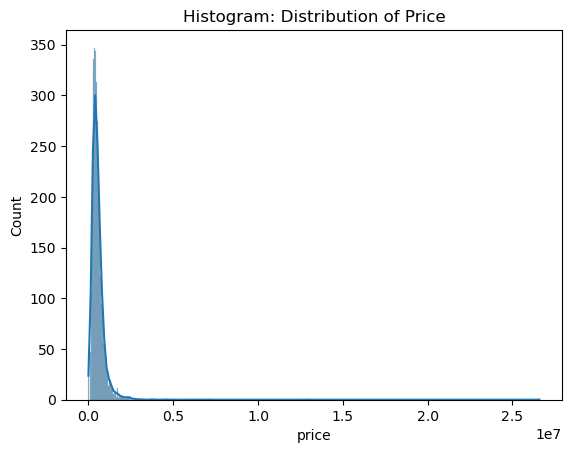

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
sns.histplot(df['price'], kde=True)
plt.title('Histogram: Distribution of Price')
plt.show()

In [67]:
# Creating a new feature and normalizing numeric values
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  ...

C:\Users\SLP14043\AppData\Local\Temp\ipykernel_16292\1857811929.py:6: RuntimeWarning: divide by zero encountered in log
  df['Log_Price'] = df['price'].apply(lambda x: np.log(x))


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              4600 non-null   datetime64[ns]
 1   price             4600 non-null   float64       
 2   bedrooms          4600 non-null   float64       
 3   bathrooms         4600 non-null   float64       
 4   sqft_living       4600 non-null   int64         
 5   sqft_lot          4600 non-null   int64         
 6   floors            4600 non-null   float64       
 7   waterfront        4600 non-null   int64         
 8   view              4600 non-null   int64         
 9   condition         4600 non-null   int64         
 10  sqft_above        4600 non-null   int64         
 11  sqft_basement     4600 non-null   int64         
 12  yr_built          4600 non-null   int64         
 13  yr_renovated      4600 non-null   int64         
 14  street            4600 n

<Axes: xlabel='Log_Price', ylabel='Count'>

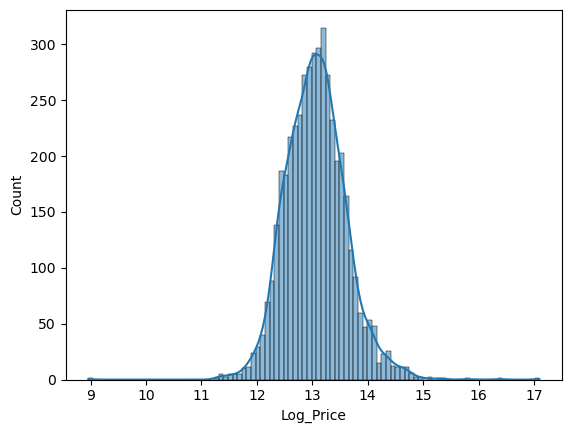

In [73]:
sns.histplot(df['Log_Price'], kde=True)

<Axes: xlabel='Normalized_Price', ylabel='Count'>

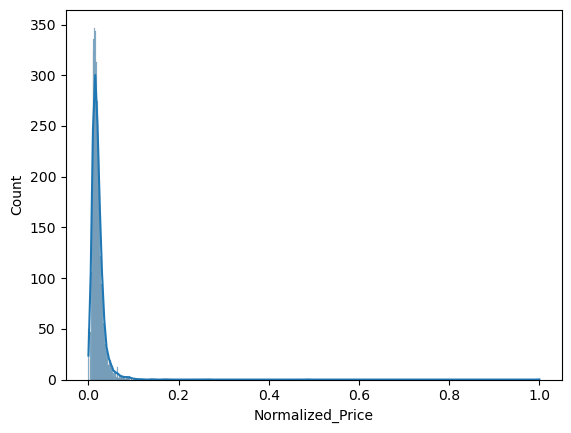

In [75]:
sns.histplot(df['Normalized_Price'], kde=True)

## __7. Data Binning__
Data binning, also known as discretization, is a technique in data transformation to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

In [87]:
# Data Binning: Creating bins for the 'price' column
# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Define bin edges
    bin_edges = [10000, 100000, 200000, 300000, 4000000, 5000000, np.inf]  # Adjust bin edges as needed

    # Define bin labels
    bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501+']

    # Create a new categorical column 'Price_Category' based on binning
    df['Price_Category'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

    # Displaying the DataFrame with the new 'Price_Category' column
    print("DataFrame with Price_Category column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")


DataFrame with Price_Category column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condi

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              4600 non-null   datetime64[ns]
 1   price             4600 non-null   float64       
 2   bedrooms          4600 non-null   float64       
 3   bathrooms         4600 non-null   float64       
 4   sqft_living       4600 non-null   int64         
 5   sqft_lot          4600 non-null   int64         
 6   floors            4600 non-null   float64       
 7   waterfront        4600 non-null   int64         
 8   view              4600 non-null   int64         
 9   condition         4600 non-null   int64         
 10  sqft_above        4600 non-null   int64         
 11  sqft_basement     4600 non-null   int64         
 12  yr_built          4600 non-null   int64         
 13  yr_renovated      4600 non-null   int64         
 14  street            4600 n

<Axes: xlabel='Price_Category', ylabel='Count'>

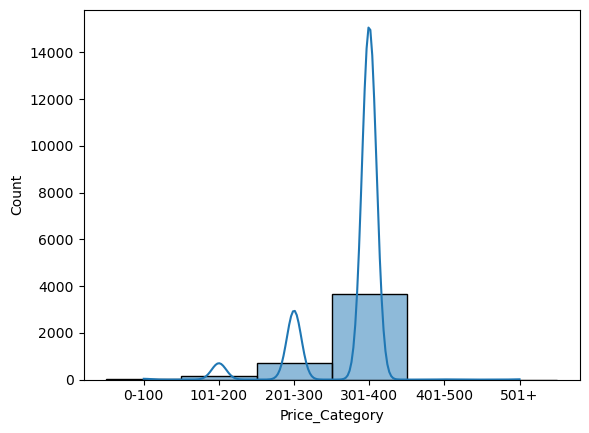

In [89]:
sns.histplot(df['Price_Category'], kde=True)

## __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

**Winsorization:** It is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

<Axes: xlabel='price'>

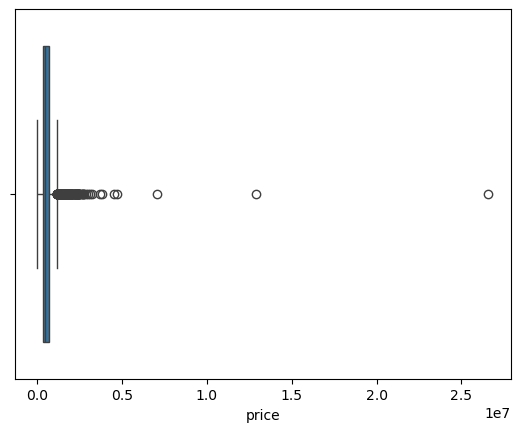

In [93]:
sns.boxplot(df['price'], orient='h')

In [95]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column with limits [0.05, 0.05]
    df['Winsorized_Price'] = winsorize(df['price'], limits=[0.05, 0.05])

    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with winsorized column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition

<Axes: xlabel='Winsorized_Price'>

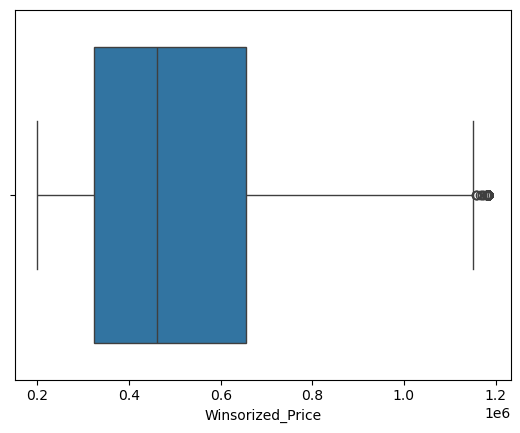

In [97]:
sns.boxplot(df['Winsorized_Price'], orient='h')

## __9. Pandas Joining Techniques__

Pandas provides various joining techniques, such as merging, joining, and concatenating, which allow datasets to be combined using one or more keys. Each method has unique behaviors and applications.


- **Concatenate**: It appends DataFrames vertically or horizontally, offering a straightforward way to combine datasets with distinct columns or indices without regard for overlapping keys or index values.

- **Merge**: It combines DataFrames by aligning columns with shared keys, allowing for detailed control over overlapping column names and the use of multiple keys.

- **Join**: It aligns DataFrames based on their index values, making it ideal for coordinating data with corresponding indices.

These techniques are essential for integrating and analyzing different datasets. They enable a thorough understanding and help in making informed decisions in data-driven applications.

### __9.1 Pandas Concatenate__

- The __pd.concat()__ method combines DataFrames along rows or columns, preserving indices and columns.
- Specify axis=0 to concatenate along rows (vertical concatenation) or axis=1 to concatenate along columns (horizontal concatenation).

In [99]:
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)
print(df1)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)
print(df2)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)
print(df3)

frames = [df1, df2, df3]
Result = pd.concat(frames)
print(Result)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Concatenate.png)

Here's another example illustrating concatenation along both the vertical and horizontal axes.

In [103]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})


df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

# Concatenate along rows (stack vertically)
Result_row = pd.concat([df1, df2], axis=0)

# Concatenate along columns (stack horizontally)
Result_column = pd.concat([df1, df2], axis=1)

print("\nDataframe 1:")
print(df1)
print("\nDataframe 2:")
print(df2)

print("\nConcatenated along rows:")
print(Result_row)

print("\nConcatenated along columns:")
print(Result_column)


Dataframe 1:
   A  B
0  1  4
1  2  5
2  3  6

Dataframe 2:
   A   B
0  7  10
1  8  11
2  9  12

Concatenated along rows:
   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12

Concatenated along columns:
   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12


### __9.2 Pandas Merge DataFrames__

- Utilize the  **pd.merge()** method to merge DataFrames based on specific keys or columns.
- Specify the join type in Pandas merge, which controls how rows from two DataFrames are combined.
- This ensures data alignment and prevents unintended outcomes.
- Choose the appropriate `how` parameter to specify the type of join.
- Specify the `on` parameter to indicate the column(s) to merge on.



**Types of Pandas Join**

There are various join logics available to merge Pandas DataFrames:

- Full Outer Join: It merges all rows from both DataFrames, using NaN to fill in missing values when no match is found.

- Inner Join: It combines matching rows from DataFrame 1 and DataFrame 2 based on a common key column.

- Right Join: It retains all rows from the right DataFrame, merges on common keys, and fills missing values with NaN.

- Left Join: It retains all rows from the left DataFrame, merging matching rows from the right and filling unmatched values with NaN.

- Cross: It creates the cartesian product of the rows of both frames.

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
print("\nDataframe 1:")
print(left)
print("\nDataframe 2:")
print(right)


Dataframe 1:
  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

Dataframe 2:
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


**Full Outer Join**

In [ ]:
Result = pd.merge(left, right, how="outer", on=["key1", "key2"])
print(Result)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/outer_merge.png)


**Inner Join**

In [ ]:
Result = pd.merge(left, right, how="inner", on=["key1", "key2"])
print(Result)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_inner.png)

**Right Join**

In [ ]:
Result = pd.merge(left, right, how="right", on=["key1", "key2"])
print(Result)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_right.png)

**Left Join**

In [ ]:
Result = pd.merge(left, right, how="left", on=["key1", "key2"])
print(Result)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_letf.png)

**Cross**

In [ ]:
Result = pd.merge(left, right, how="cross")
print(Result)

   key1_x key2_x   A   B key1_y key2_y   C   D
0      K0     K0  A0  B0     K0     K0  C0  D0
1      K0     K0  A0  B0     K1     K0  C1  D1
2      K0     K0  A0  B0     K1     K0  C2  D2
3      K0     K0  A0  B0     K2     K0  C3  D3
4      K0     K1  A1  B1     K0     K0  C0  D0
5      K0     K1  A1  B1     K1     K0  C1  D1
6      K0     K1  A1  B1     K1     K0  C2  D2
7      K0     K1  A1  B1     K2     K0  C3  D3
8      K1     K0  A2  B2     K0     K0  C0  D0
9      K1     K0  A2  B2     K1     K0  C1  D1
10     K1     K0  A2  B2     K1     K0  C2  D2
11     K1     K0  A2  B2     K2     K0  C3  D3
12     K2     K1  A3  B3     K0     K0  C0  D0
13     K2     K1  A3  B3     K1     K0  C1  D1
14     K2     K1  A3  B3     K1     K0  C2  D2
15     K2     K1  A3  B3     K2     K0  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_cross.png)

### __9.3 Pandas Join DataFrames__

- Use the __join()__ method to join DataFrames based on their indices
- Specify the `how` parameter to determine the type of join, similar to __pd.merge()__
- Use the `on` parameter if joining on specific columns, or simply call __join()__ without parameters to perform a simple index-based join




In [105]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
print(left)
right = pd.DataFrame({"C": ["C0", "C1"],
                      "D": ["D0", "D1"]},
                      index=["K0", "K1"])
print(right)
Result = left.join(right, on="key")
print(Result)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K0
3  A3  B3  K1
     C   D
K0  C0  D0
K1  C1  D1
    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K0  C0  D0
3  A3  B3  K1  C1  D1


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/join.png)

## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

- Common aggregation functions include average(mean), median, minimum(min), maximum(max), sum, standard deviation(std), variance(var), and count.

In [107]:
import pandas as pd

# Creating a DataFrame with a 'Category' column and a 'Value' column
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 15, 20, 25, 30]}
df = pd.DataFrame(data)
print(df)

# Grouping the DataFrame by 'Category' and calculating various aggregations
df_aggregated = df.groupby('Category').agg({
    'Value': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
df_aggregated

  Category  Value
0        A     10
1        B     15
2        A     20
3        B     25
4        A     30
Aggregated DataFrame:


Value                                           
          mean median min max sum        std    var count
Category                                                 
A         20.0   20.0  10  30  60  10.000000  100.0     3
B         20.0   20.0  15  25  40   7.071068   50.0     2

## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Reshaping_data.png)

In [113]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})
print(df)

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)

         Date Category  Value
0  2022-01-01        A     10
1  2022-01-01        B     15
2  2022-01-02        A     20
3  2022-01-02        B     25
Pivoted DataFrame:
Category     A   B
Date              
2022-01-01  10  15
2022-01-02  20  25


# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on their price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply the necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__